## Numpy 与原生 Python 用于数组计算的性能对比

##### 需求：

- 实现两个数组的加法
- 数组 `A` 是 `1~N` 数字的平方
- 数组 `B` 是 `1~N` 数字的立方

##### 对比使用 Numpy 和原生 Python 的性能对比

#### 引入 Numpy 的包

In [ ]:
import numpy as np

### 使用 Python 原生语法实现对比

In [13]:
def python_sum(n):
    """python实现数组的加法
    @param n：数组的长度
    """

    a = [i**2 for i in range(n)]
    b = [i**3 for i in range(n)]
    c = []
    for i in range(n):
        c.append(a[i] + b[i])
    return c

In [14]:
# 测试一下
python_sum(10)


[0, 2, 12, 36, 80, 150, 252, 392, 576, 810]

### 使用 numpy 实现

In [15]:
def numpy_sum(n):
    """numpy实现数组的加法
    @param n：数组的长度
    """
    
    a = np.arange(n) ** 2
    b = np.arange(n) ** 3
    return a + b

In [16]:
# 测试一下
numpy_sum(10)

array([  0,   2,  12,  36,  80, 150, 252, 392, 576, 810])

## 性能对比：执行1000次

In [44]:
%timeit python_sum(1000)

548 µs ± 16.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [45]:
%timeit numpy_sum(1000)

7.65 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


## 性能对比：执行10W次

In [46]:
%timeit python_sum(10 * 10000)

61.2 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [47]:
%timeit numpy_sum(10 * 10000)

489 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 性能对比：执行1000W次

In [48]:
%timeit python_sum(1000 * 10000)

7.73 s ± 433 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit numpy_sum(1000 * 10000)

96.9 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## 绘制性能对比图

In [36]:
pytimes = [548 , 61.2 * 1000 , 7.73 *1000 * 1000]
nptimes = [7.65 , 489 , 96.9 * 1000]

In [37]:
import pandas as pd

In [42]:
df = pd.DataFrame({
    "python times":pytimes,
    "numpy times":nptimes,
})

In [52]:
df

,python times,numpy times
0,949.0,12.8
1,108000.0,679.0
2,12200000.0,126000.0


<AxesSubplot:>

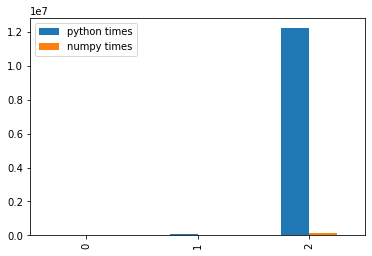

In [53]:
%matplotlib inline
df.plot.bar()